In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm

In [3]:
train_dir='/kaggle/input/egyptian-hieroglyphs/train/'
val_dir='/kaggle/input/egyptian-hieroglyphs/valid/'
test_dir='/kaggle/input/egyptian-hieroglyphs/test/'

train_df_dir='/kaggle/input/egyptian-hieroglyphs/train/_annotations.csv'
val_df_dir='/kaggle/input/egyptian-hieroglyphs/valid/_annotations.csv'
test_df_dir='/kaggle/input/egyptian-hieroglyphs/test/_annotations.csv'

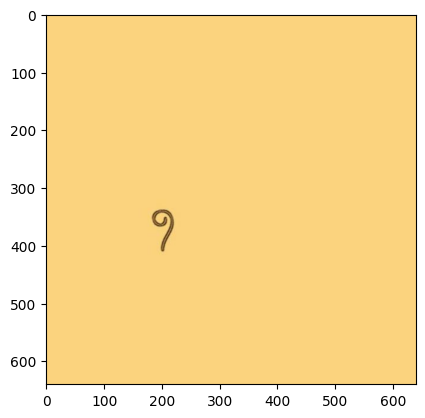

In [4]:
r=cv2.imread(train_dir+'100-1-_jpg.rf.49980299b8c88f71ceded2c7ae0192de.jpg')
r=cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
plt.imshow(r)

In [5]:
df_train=pd.read_csv(train_df_dir)
df_val=pd.read_csv(val_df_dir)
df_test=pd.read_csv(test_df_dir)

df_train.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nile-fish-7-_jpg.rf.31e4278980878c47a1e6a2f8dd...,640,640,Nile_Fish,375,319,512,454
1,Her-8-_jpg.rf.32bcf63f4ae4d6aea53cea5b9c0059b4...,640,640,Her,211,247,368,339
2,composite_bow-34-_jpg.rf.33153e63f7158777c50d4...,640,640,Composite_Bow,158,183,336,282
3,snake-6-_jpg.rf.32ac52ece4bcc06b1ead936693df17...,640,640,Snake,181,351,318,506
4,king-26-_jpg.rf.329a5a8e366f4fe2e3a3dca88524cc...,640,640,King,218,290,339,524
5,fish-14-_jpg.rf.32c2bcf21548386e8ea3dab04a91d1...,640,640,Fish,352,126,534,245
6,fish-22-_jpg.rf.3269230d2a3f6616f742ae4e753408...,640,640,Fish,290,336,426,457
7,canal-9-_jpg.rf.330f4f09d72d4a128afc0c046367d3...,640,640,Canal,372,356,578,503
8,mother-9-_jpg.rf.3236ab666b1936299766aa96ce3bf...,640,640,Mother,221,94,348,294
9,giraffe-14-_jpg.rf.325508145b800d22da24a3091d6...,640,640,Giraffe,407,80,569,333


In [6]:
N_CLASSES = df_train['class'].nunique()
N_CLASSES

95

In [7]:
def process_split(df,data_dir) :
    new_size = 224    
    X_data = []
    y_data = []
    #labels_df.iterrows()
    for index, row in tqdm(df.iterrows()):
        image_file = row['filename']
        label = row['class'] 
        image_path = os.path.join(data_dir, image_file)
        orignal_image = cv2.imread(image_path)

        if orignal_image is not None:
            xmin = int(row['xmin'])
            ymin = int(row['ymin'])
            xmax = int(row['xmax'])
            ymax = int(row['ymax'])

            cropped_image = orignal_image[ymin:ymax, xmin:xmax]

            image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(image, (new_size, new_size))
            X_data.append(resized_image)
            y_data.append(label)
        else:
            print(f"Failed to read image: {image_file}")
    print("items in X_data is:       ",len(X_data) , " items") 
    print("items in y_data is:       ",len(y_data) , " items")
    return np.array(X_data),np.array(y_data)

In [8]:
x_train,y_train=process_split(df_train,train_dir)


2723it [00:16, 167.57it/s]


items in X_data is:        2723  items
items in y_data is:        2723  items


In [9]:
x_test,y_test=process_split(df_test,test_dir)

389it [00:02, 165.70it/s]

items in X_data is:        389  items
items in y_data is:        389  items


In [10]:
x_valid,y_valid=process_split(df_val,val_dir)

778it [00:04, 166.23it/s]

items in X_data is:        778  items
items in y_data is:        778  items


In [11]:
x_train.shape


(2723, 224, 224, 3)

In [12]:
y_train.shape   

(2723,)

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid=x_valid.astype('float32')

x_train /= 255
x_test /= 255
x_valid/= 255

In [14]:
y_train = y_train.reshape(-1, 1)  #convert to 2d
y_test = y_test.reshape(-1, 1) 
y_valid = y_valid.reshape(-1, 1) 

In [15]:
y_train

array([['Nile_Fish'],
       ['Her'],
       ['Composite_Bow'],
       ...,
       ['Nursing'],
       ['This'],
       ['Owl']], dtype='<U21')

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
y_valid=le.fit_transform(y_valid)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, N_CLASSES)
y_valid = to_categorical(y_valid, N_CLASSES)
y_test =  to_categorical(y_test, N_CLASSES)

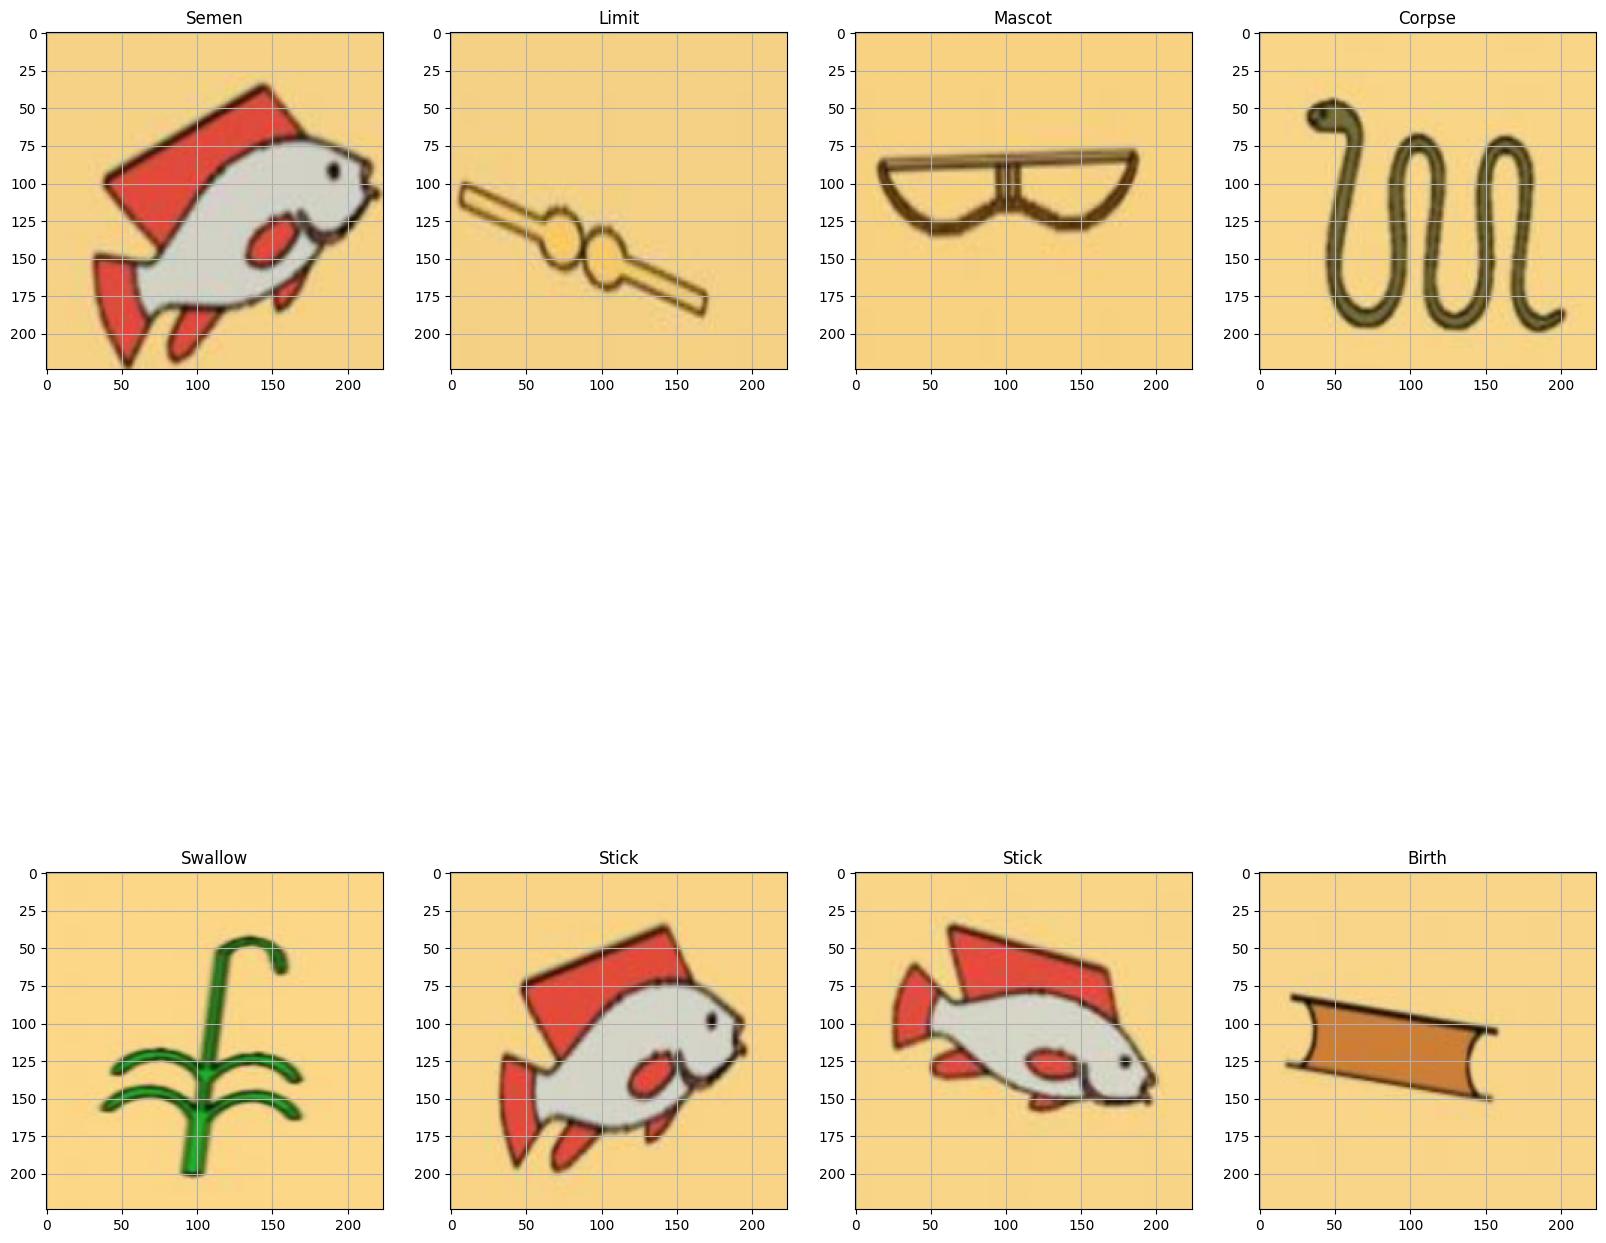

In [18]:
classes=list((set(df_train['class'])))
plt.figure(figsize=(20,20))
    # create a grid of 3x3 images
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[np.where(y_train[i]==1)[0][0]])   # when y is categorical
    #plt.title(classes[int(y_train[i])])   # when y is binary or sparse 
    plt.grid(None)
plt.show()

In [19]:
models = { 
"Xception": tf.keras.applications.Xception,

"VGG16": tf.keras.applications.VGG16,

"VGG19": tf.keras.applications.VGG19,

"ResNet50": tf.keras.applications.ResNet50,

"ResNet101": tf.keras.applications.ResNet101,

"ResNet152": tf.keras.applications.ResNet152,

"InceptionV3": tf.keras.applications.InceptionV3,

"MobileNet": tf.keras.applications.MobileNet,

"MobileNetV2": tf.keras.applications.MobileNetV2,

"DenseNet121": tf.keras.applications.DenseNet121,

"DenseNet169": tf.keras.applications.DenseNet169,

"DenseNet201": tf.keras.applications.DenseNet201,

"NASNetMobile": tf.keras.applications.NASNetMobile,

"NASNetLarge": tf.keras.applications.NASNetLarge,

"EfficientNetB0": tf.keras.applications.EfficientNetB0,

"EfficientNetB1": tf.keras.applications.EfficientNetB1,

"EfficientNetB2": tf.keras.applications.EfficientNetB2,

"EfficientNetB3": tf.keras.applications.EfficientNetB3,

"EfficientNetB4": tf.keras.applications.EfficientNetB4,

"EfficientNetB5": tf.keras.applications.EfficientNetB5,

"EfficientNetB6": tf.keras.applications.EfficientNetB6,

"EfficientNetB7": tf.keras.applications.EfficientNetB7
}

In [20]:
# Define input shape
input_shape = (224, 224, 3)  # Adjust height, width, and channels as needed


# Define inputs
inputs = tf.keras.Input(shape=input_shape)
print(inputs )
model_name='VGG19'
# Load the base model
base_model = models[model_name](include_top=False, weights='imagenet', input_tensor=inputs)
# Freeze the base model layers
base_model.trainable = False


x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(95, activation='softmax')(x)

# Create model
model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy",'precision','recall'])


# Display summary
model.summary()


<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,179,615 (76.98 MB)

 Trainable params: 154,591 (603.87 KB)

 Non-trainable params: 20,025,024 (76.39 MB)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [22]:
# Training the model
history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=None,
                    validation_data=(x_valid,y_valid),
                    callbacks=callbacks
                    )

Epoch 1/50


I0000 00:00:1729887926.667428     114 service.cc:145] XLA service 0x7a5508007fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729887926.667488     114 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/86 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.0078 - loss: 5.0801 - precision: 0.0000e+00 - recall: 0.0000e+00      

I0000 00:00:1729887938.861633     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 222ms/step - accuracy: 0.0545 - loss: 4.5697 - precision: 0.4155 - recall: 0.0025 - val_accuracy: 0.0604 - val_loss: 4.2858 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.3167 - loss: 2.9835 - precision: 0.8461 - recall: 0.0315 - val_accuracy: 0.4717 - val_loss: 3.7316 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.5430 - loss: 2.2021 - precision: 0.9694 - recall: 0.0992 - val_accuracy: 0.7481 - val_loss: 2.9303 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.6553 - loss: 1.7018 - precision: 0.9537 - recall: 0.1980 - val_accuracy: 0.8740 - val_loss: 1.9174 - val_precision: 1.0000 - val_recall: 0.0103 - learning_rate: 0.0010
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/ste

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)


(2723, 224, 224, 3)
(2723, 95)
(778, 224, 224, 3)
(778, 95)


In [24]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall =history.history['recall']
val_recall =history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

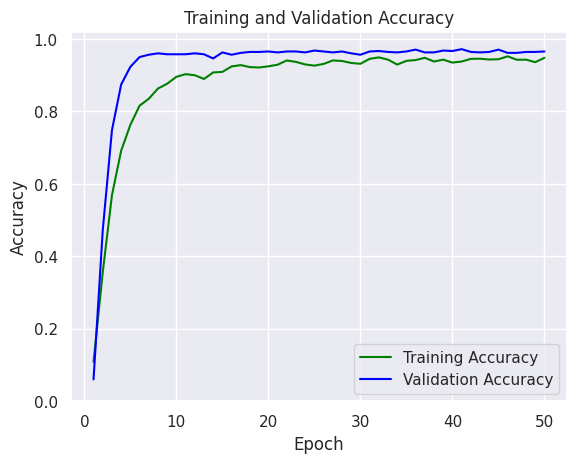

In [25]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

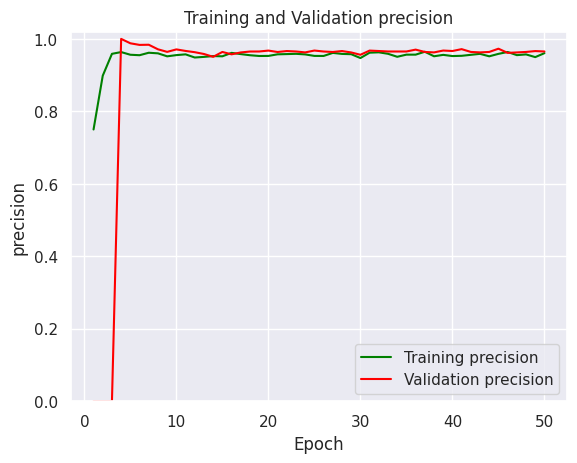

In [26]:
plt.figure()
#loss plot
plt.plot(epochs, precision, color='green', label='Training precision')
plt.plot(epochs, val_precision, color='red', label='Validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.legend()
plt.ylim(0,1.02)
plt.show()

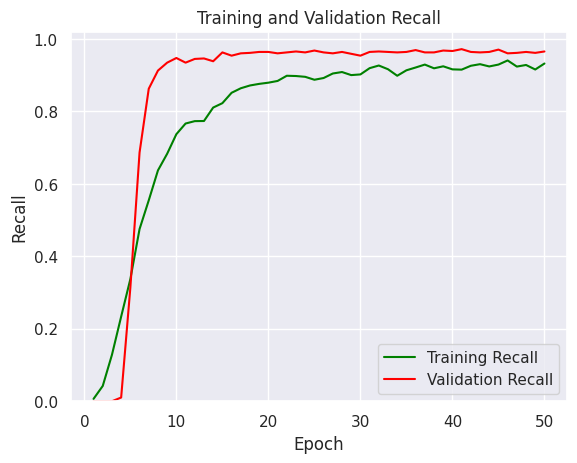

In [27]:
plt.figure()
#loss plot
plt.plot(epochs, recall, color='green', label='Training Recall')
plt.plot(epochs, val_recall, color='red', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.ylim(0,1.02)
plt.show()

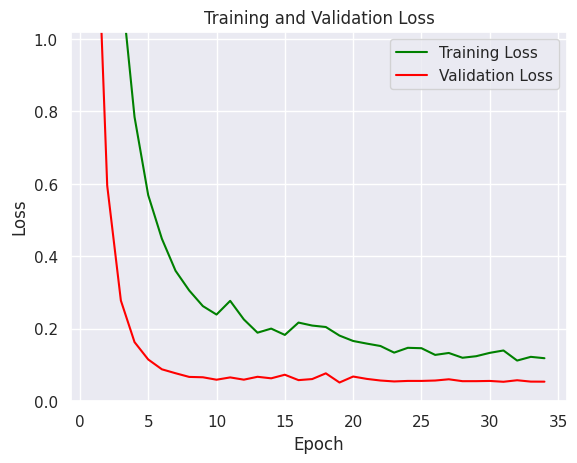

In [52]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [53]:
# Evaluate the model
model_evaluate = model.evaluate(x_train,y_train)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9784 - loss: 0.0411 - precision: 0.9784 - recall: 0.9784
Loss     :  0.03647301718592644
Accuracy :  0.9831068515777588
Precision  :  0.9831068515777588
Recall :  0.9831068515777588


In [55]:
# Evaluate the model
model_evaluate = model.evaluate(x_valid,y_valid)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9725 - loss: 0.0454 - precision: 0.9725 - recall: 0.9714
Loss     :  0.05171310156583786
Accuracy :  0.9730077385902405
Precision  :  0.9729729890823364
Recall :  0.9717223644256592


In [56]:
# Evaluate the model
model_evaluate = model.evaluate(x_test,y_test)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.5372 - loss: 7.5085 - precision: 0.5336 - recall: 0.5299
Loss     :  7.177817344665527
Accuracy :  0.5655527114868164
Precision  :  0.5644329786300659
Recall :  0.5629820227622986


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score



y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

accuracy_train = accuracy_score(y_train_true, y_train_pred_class)
accuracy_test = accuracy_score(y_test_true, y_test_pred_class)

f1_train = f1_score(y_train_true, y_train_pred_class, average='weighted')
f1_test = f1_score(y_test_true, y_test_pred_class, average='weighted')

precision_train = precision_score(y_train_true, y_train_pred_class, average='weighted')
precision_test = precision_score(y_test_true, y_test_pred_class, average='weighted')

recall_train = recall_score(y_train_true, y_train_pred_class, average='weighted')
recall_test = recall_score(y_test_true, y_test_pred_class, average='weighted')

print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Training F1 Score: {f1_train:.2f}")
print(f"Test F1 Score: {f1_test:.2f}")
print(f"Training Precision: {precision_train:.2f}")
print(f"Test Precision: {precision_test:.2f}")
print(f"Training Recall: {recall_train:.2f}")
print(f"Test Recall: {recall_test:.2f}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training Accuracy: 0.98
Test Accuracy: 0.57
Training F1 Score: 0.98
Test F1 Score: 0.56
Training Precision: 0.99
Test Precision: 0.56
Training Recall: 0.98
Test Recall: 0.57


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
data = {
    'model': ['transfer learning'],
    'Accuracy train': [accuracy_train],
    'Accuracy test': [accuracy_test],
    'Precision train': [precision_train],
    'Precision test': [precision_test],
    'Recall train': [recall_train],
    'Recall test': [recall_test],
    'F1-score train': [f1_train],
    'F1-score test': [f1_test]
}


metrics_df = pd.DataFrame(data)
metrics_df

,model,Accuracy train,Accuracy test,Precision train,Precision test,Recall train,Recall test,F1-score train,F1-score test
0,transfer learning,0.983107,0.565553,0.987304,0.564696,0.983107,0.565553,0.982092,0.561954
